# With this simple Python code, I will estimate the return of a portfolio compound by 5 securities, all of them traded in Sao Paulo Stock Exchange, Brazil. I randomly picked the securities, and I assume the portfolio is equally weighted, just a theoretical proposition to run the codes that allow us to use Python in finance applications. The first thing that I have done is downloading historical data for Itausa (ticker ITSA4), Gerdau (GOAU4), Embraer (Embr3), Petrobras (PETR4), and CPFL, (CPFE3). After that, we created a repository for the downloaded data (we could have also used the online api provided by YahooFinance. I use the Anaconda Navigator, which is a pretty complete package for analysing financial or any orther type of data. The code will be written on next lines, hope it can be repplied by anyone willing to measure returns of any stock or any other matter. 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv('Pfolio_stocks_br.csv', index_col='Date')

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 6/22/15 to 6/19/20
Data columns (total 5 columns):
ITSA4    1241 non-null float64
GOAU4    1241 non-null float64
EMBR3    1241 non-null float64
PETR4    1241 non-null float64
CPFE3    1241 non-null float64
dtypes: float64(5)
memory usage: 58.3+ KB


In [4]:
mydata.head()

,ITSA4,GOAU4,EMBR3,PETR4,CPFE3
Date,,,,,
6/22/15,5.233504,6.552751,23.188370,12.218085,17.112970
6/23/15,5.233504,6.468259,23.043196,12.032542,16.955807
6/24/15,5.221835,6.271112,22.694790,12.264473,16.789963
6/25/15,5.134320,6.196010,22.646400,11.689284,16.274797
6/26/15,5.245173,6.318053,23.178694,12.255195,16.973259


In [5]:
mydata.tail()

,ITSA4,GOAU4,EMBR3,PETR4,CPFE3
Date,,,,,
6/15/20,9.56,6.42,8.58,20.700001,31.600000
6/16/20,9.76,6.89,9.05,21.370001,31.170000
6/17/20,9.93,6.85,8.95,21.440001,31.959999
6/18/20,10.25,7.02,8.87,21.600000,31.690001
6/19/20,10.41,7.06,8.76,21.469999,32.180000


# on the next cells, we normalize the data to 100, aiming to plot the initial data on a graph and understand the behavior of each stock's returns in a comparable fashion across the timeframe we analyse, 5 years. 

In [6]:
mydata.iloc[0]

ITSA4     5.233504
GOAU4     6.552751
EMBR3    23.188370
PETR4    12.218085
CPFE3    17.112970
Name: 6/22/15, dtype: float64

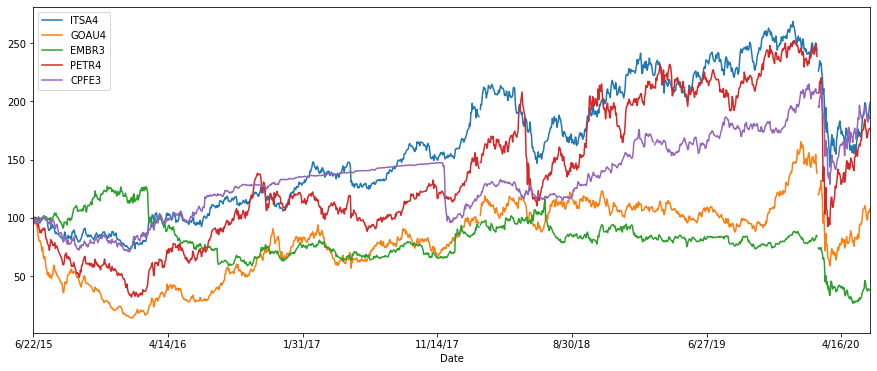

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

# on the next lines of code, we will estimate the simple return of each stock compounding our portfolio. 

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,ITSA4,GOAU4,EMBR3,PETR4,CPFE3
Date,,,,,
6/22/15,NaN,NaN,NaN,NaN,NaN
6/23/15,0.000000,-0.012894,-0.006261,-0.015186,-0.009184
6/24/15,-0.002230,-0.030479,-0.015120,0.019275,-0.009781
6/25/15,-0.016759,-0.011976,-0.002132,-0.046899,-0.030683
6/26/15,0.021591,0.019697,0.023505,0.048413,0.042917


# here we will define a numpy array with the weights of each security in our portfolio. as we have mentioned earlier, we assume this is a equally weighted portfolio.

In [9]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

# on the next line of code, we annualize the daily returns previously estimated for each stock.

In [13]:
returns_a = returns.mean() * 250
returns_a

ITSA4    0.200236
GOAU4    0.211222
EMBR3   -0.078957
PETR4    0.282591
CPFE3    0.182208
dtype: float64

# on the next cells, we basically multiply the matrix with the returns of each security by the corresponding security weight on the portfolio. 

In [15]:
np.dot(returns_a, weights)

0.15946004761208868

In [20]:
pfolio_1 = str(round(np.dot(returns_a, weights), 5) * 100) + ' %'
print (pfolio_1)

15.946 %
